In [1]:
#Qiskit Advocate Questions
#Questions related to Qiskit Aer
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *

# lib from Qiskit Aqua
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasicSwap
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import HGate, CXGate
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
q_simulator = Aer.get_backend('qasm_simulator')
u_simulator = Aer.get_backend('unitary_simulator')
s_simulator = Aer.get_backend('statevector_simulator')

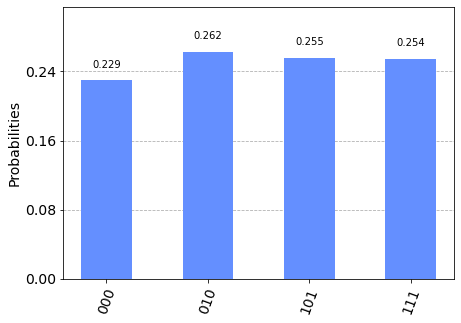

In [17]:
#1. Which of the following could be the result of the following Aer simulation?
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.h(1)
circ.cx(0, 1)
circ.cx(0, 2)
circ.measure([0,1,2],[0,1,2])

simulator = Aer.get_backend('qasm_simulator')

result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts)

A. <img src="questions/aer1_images/1_w1.png">
B. <img src="questions/aer1_images/1_w2.png">
C. <img src="questions/aer1_images/1_w3.png">
D. <img src="questions/aer1_images/1_w4.png">
E. None of the above

In [3]:
#2. What is the result of this circuit when run on the statevector simulator?
qc = QuantumCircuit(3)
qc.h([0,1,2])
"""
Note L Question variation - The circuit may also be written as
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
qc.h(qr)
"""
s_results = execute(qc, backend=s_simulator).result()
print(s_results.results)
#A. [0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
# 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j]
#B. [0.70710678+0j, 0.70710678+0j, 0.70710678+0j, 0.70710678+0j, 
#0.70710678+0j, 0.70710678+0j, 0.70710678+0j, 0.70710678+0j]
#C. [0+0.70710678j, 0.70710678+0j,0+0.70710678j, 0.70710678+0j, 
# 0+0.70710678j, 0.70710678+0j, 0+0.70710678j, 0.70710678+0j]
#D. [0.35355339+0.j, 0+0.35355339j, 0.35355339+0.j, 0+0.35355339j, 
# 0.35355339+0.j, 0+0.35355339j, 0.35355339+0.j, 0+0.35355339j]
#None of the above

[ExperimentResult(data=ExperimentResultData(statevector=array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=3, name='circuit8', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=1122849803, shots=1024, status='DONE', success=True, time_taken=0.0288374)]


In [6]:
#3. What is the result of this circuit when run on the unitary simulator?
qc = QuantumCircuit(2)
qc.x([0,1])
qc.z(0)
u_results = execute(qc, backend=u_simulator).result()
print(u_results.get_unitary())
#A. [[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
#  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
# [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
# [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]

#B. [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
# [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
# [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
# [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]

#C. [[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
# [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
# [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
# [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]

#D. [[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
# [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
# [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
# [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]

#None of the above

[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]


In [29]:
#4. Which of these configuration options could result in the following result object/counts?
# Construct quantum circuit
circ = QuantumCircuit(2)
circ.h([0,1])
circ.measure_all()
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get memory
#result = <span style="color:red;">execute(*what goes in here?*)</span>.result()
result = execute(circ, QasmSimulator(), shots=15, memory=True).result()
memory = result.get_memory(circ)
print(memory)
#> ['01', '10', '00', '11', '00', '10', '00', '01', '00', '11', '11', '11', '11',' 11',' 11']
#1)  execute(qc, StatevectorSimulator(), shots=15, memory=True)
#2)  execute(qc, QasmSimulator(), shots=10, memory=True)
#3)  execute(qc, QasmSimulator(), shots=15, memory=True)
#4)  execute(qc, QasmSimulator(), shots=15, memory=False)
#5)  None of the above

['00', '10', '11', '11', '01', '00', '11', '00', '10', '10', '10', '01', '00', '10', '11']


#5. How do you create a circuit in the following state?
<img src="http://latex.codecogs.com/svg.latex?\frac{1}{\sqrt{2}}\left(\vert01\rangle+\vert10\rangle\right)" border="0"/>

In [13]:
#A. Circuit 1: 
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.initialize([0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])
print(execute(qc, backend=s_simulator).result())

Result(backend_name='statevector_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 18, 11, 25, 54, 50828), header=Obj(backend_name='statevector_simulator', backend_version='0.4.1'), job_id='7bc4e356-a68a-4e94-9a8d-458941fd893c', metadata={'max_memory_mb': 16081, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000154289}, qobj_id='a25effe4-c421-42eb-b97f-79ecd65fe988', results=[ExperimentResult(data=ExperimentResultData(statevector=array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='circuit17', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3216792012, shots=1, status='DONE', success=True, time_taken=7.683700000000001e-05)], status='COMPLETED', success=True, time_taken=0.002565145492553711)


In [14]:
#B. Circuit 2: 
qr = QuantumRegister(2, inital_state=[0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])
qc = QuantumCircuit(qr)
print(execute(qc, backend=s_simulator).result())

SyntaxError: positional argument follows keyword argument (<ipython-input-14-c6f41501e1e0>, line 2)

In [15]:
#C. Circuit 3: 
qr = QuantumRegister(2)
qc = QuantumCircuit(qr, inital_state=[0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])
print(execute(qc, backend=s_simulator).result())

SyntaxError: positional argument follows keyword argument (<ipython-input-15-7488066656a7>, line 3)

In [16]:
#D. Circuit 4: 
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.initialize([1, 0, 1, 0] / np.sqrt(2), [qr[0], qr[1]])
print(execute(qc, backend=s_simulator).result())

Result(backend_name='statevector_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 18, 11, 27, 36, 535640), header=Obj(backend_name='statevector_simulator', backend_version='0.4.1'), job_id='11dd35f1-b1b1-46ea-84db-de88345d9502', metadata={'max_memory_mb': 16081, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000155665}, qobj_id='f5d21c84-197f-45ea-9b89-c30e194f61ef', results=[ExperimentResult(data=ExperimentResultData(statevector=array([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='circuit19', qreg_sizes=[['q1', 2]], qubit_labels=[['q1', 0], ['q1', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=642617439, shots=1, status='DONE', success=True, time_taken=7.874100000000001e-05)], status='COMPLETED', success=True, time_taken=0.0027017593383789062)


In [17]:
#None of the above

In [9]:
# You can also use Statevector class in the quantum_info module to simulate circuits and obtain state vector.
#Given the following code, which option produces a different state vector from the rest?

import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
print(execute(qc, backend=s_simulator).result().get_statevector())        

#1)  qi.Statevector.from_instruction(qc)
#2)  qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))
#3)  np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))
#4)  qi.Statevector.from_label('00').evolve(qc)
#5)  None of the above
print(qi.Statevector.from_instruction(qc))
print(qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2)))
print(np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11')))
print(qi.Statevector.from_label('00').evolve(qc))

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [16]:
#You can also use Operator class in the quantum_info module to simulate circuits and obtain unitary.
#Given the following code, which option produces a different unitary from the rest?

import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
print(execute(qc, backend=u_simulator).result().get_unitary())        
                
#1)  qi.Operator(qc)
#2)  qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1])
#3)  qi.Operator.from_label('HI') + qi.Operator.from_label('CX')
#4)  qi.Operator.from_label('II').compose(qc)
#5)  None of the above

print(qi.Operator(qc))
print(qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1]))
#print(qi.Operator.from_label('HI') + qi.Operator.from_label('CX'))
print(qi.Operator.from_label('II').compose(qc))


[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]
Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,

In [ ]:
# Clifford circuits can be efficiently simulated classically in Qiskit using Clifford class in the quantum_info module.
#Which of the following is not a Clifford gate?
#1)  XGate
#2)  SdgGate
#3)  CXGate
#4)  RZGate
#5)  None of the above